In [1]:
import numpy as np
import faiss
from langchain_openai import OpenAIEmbeddings

DATA

In [20]:
# Insert Current TAG data here
texts = ["COMMERCE", "commercial activities", "business law", "contracts", "family & personal matters", "divorce", "criminal law"]

OPENAI AUTOMATIC TAGGING SYSTEM

In [21]:
embeddings = OpenAIEmbeddings(openai_api_key = "INSERT OPENAI SECRET KEY HERE")
embedd_list = []

In [ ]:
for course in texts:
    embedd_list.append(embeddings.embed_query(course))

In [ ]:
embedd_list = np.array(embedd_list).astype("float32")
index = faiss.IndexFlatL2(1536)
index.add(embedd_list)

In [ ]:
def get_tags(query):
    query = np.array([embeddings.embed_query(query)]).astype("float32")
    distances, indices = index.search(query, k=4) # k is the number of tags you want (can make as input)
    for inner_list in indices:
        for element in inner_list:
            print("Here are your tags!")
            print("\n" + texts[element])

EXAMPLE

In [ ]:
text = input("Please write the text you want to add: ")
get_tags(text)

Another Approach to Tagging System
- requires a bit more work because it only returns 1 tag currently, but signficantly more efficent

In [ ]:
import langchain.chat_models
from langchain.chat_models import ChatOpenAI
from langchain.chains import create_tagging_chain, create_tagging_chain_pydantic
from langchain.prompts import ChatPromptTemplate

In [ ]:
# Specifivy the LLM you'd like to use here
llm = ChatOpenAI(temperature=0, model = "gpt-3.5-turbo-0613",openai_api_key = "INSERT OPENAI KEY")

In [ ]:
schema = {
    "properties": {
        "tags": {
            "type": "string",
            # ADD ALL EXISITNG TAGS HERE
            "enum": [ "ACADEMIC TOPICS", "legal education and writing", "COMMERCE", "commercial activities", "business law", "contracts", "LIFE EVENTS", "family & personal matters", "divorce", "marriage", "THE LEGAL PROCESS", "criminal law", "criminal procedure", "civil procedure", "legal theory", "business sectors", "courts and procedure", "criminal law and procedure", "family law", "legal education and practice", "wex definitions", "accounting", "finance", "financial services", "business", "law", "business organizations", "corporations", "commercial transactions", "money and financial problems", "tax", "courts", "legal practice/ethics", "accidents and injuries", "standards of tort liability", "land use & zoning law", "property & real estate law", "trusts, inheritances & estates", "trademark law", "property law" ],
            "description": "tags the input with a similar string from a predefined list",
        },
    },
    "required": ["tags"],
}

In [ ]:
chain = create_tagging_chain(schema, llm)

In [ ]:
text = "A/R is the abbreviation for accounts receivable."

In [ ]:
chain.run(text)

EXAMPLE


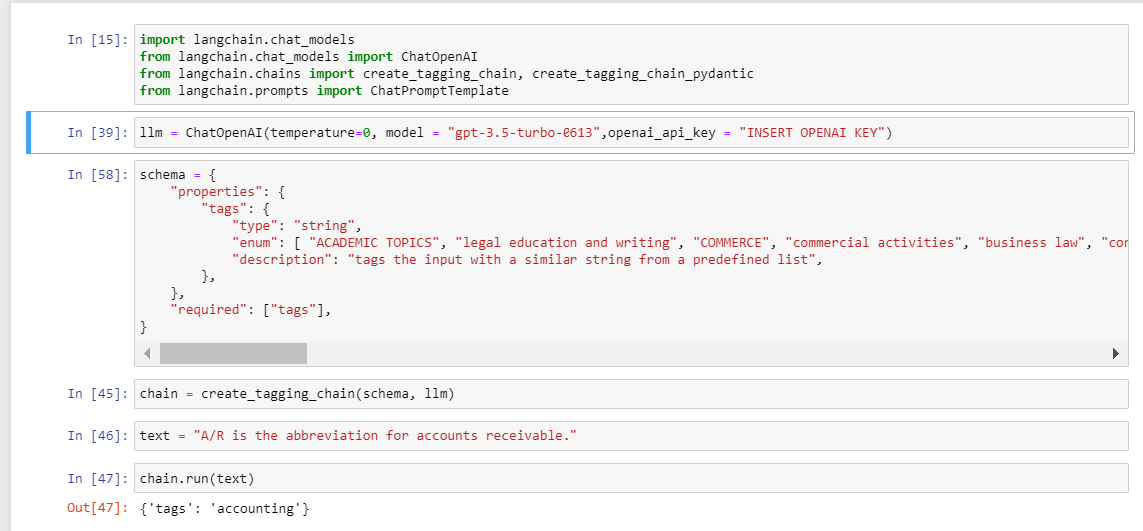